Project Title : Predicting Used Ford car Sale Price Using Feedforward
Artificial Neural Networks

Importing the Libraries

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
sns.set(style = "darkgrid" )
import tensorflow as tf
print (tf.__version__)

2.12.0


Importing the Dataset

In [158]:
df = pd.read_csv('C:/Users/User/Desktop/ford car/ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


Data Visualization and Preprocessing

In [159]:
df.isnull().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

<Axes: >

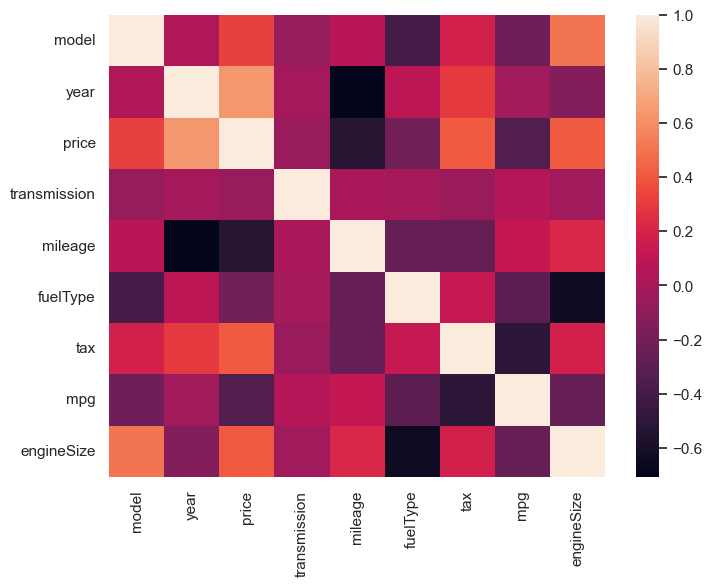

In [190]:
plt.rcParams["figure.figsize" ] = [8, 6]
sns.heatmap(df.corr())

C:\Users\User\AppData\Local\Temp\ipykernel_13952\657760468.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price' ])


<Axes: xlabel='price', ylabel='Density'>

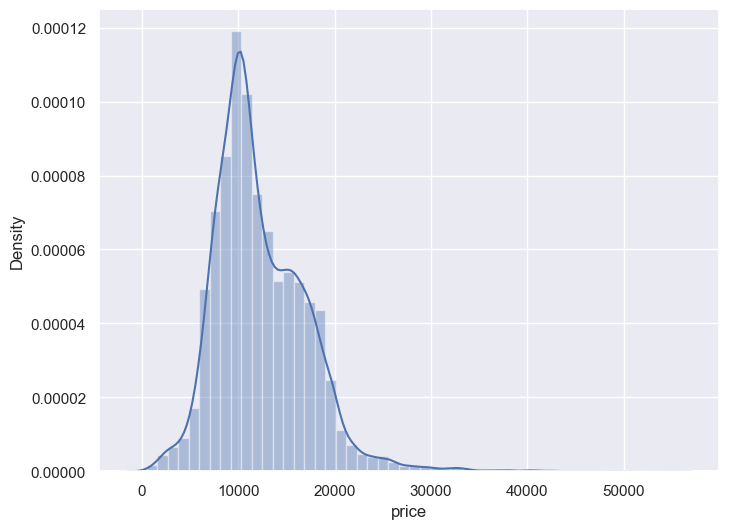

In [192]:
sns.distplot(df['price'])

Converting Categorical Columns to Numerical

In [193]:
df.nunique()

model              24
year               23
price            3511
transmission        3
mileage         13528
fuelType            5
tax                36
mpg                90
engineSize         16
dtype: int64

In [194]:
print (df.dtypes)

model             int32
year              int64
price             int64
transmission      int32
mileage           int64
fuelType          int32
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [195]:
numerical_data = df.drop([ 'model' , 'fuelType' , 'transmission' ], axis=1)
numerical_data.head()

,year,price,mileage,tax,mpg,engineSize
0,2017,12000,15944,150,57.7,1.0
1,2018,14000,9083,150,57.7,1.0
2,2017,13000,12456,150,57.7,1.0
3,2019,17500,10460,145,40.3,1.5
4,2019,16500,1482,145,48.7,1.0


In [196]:
categorical_data = df.filter([ 'model' , 'fuelType' , 'transmission' ], axis=1)
categorical_data.head()

,model,fuelType,transmission
0,5,4,0
1,6,4,1
2,6,4,1
3,5,4,1
4,5,4,0


In [197]:
categorical_data__one_hot = pd.get_dummies(categorical_data, drop_first= True)
categorical_data__one_hot.head()

,model,fuelType,transmission
0,5,4,0
1,6,4,1
2,6,4,1
3,5,4,1
4,5,4,0


In [198]:
complete_dataset = pd.concat([numerical_data, categorical_data__one_hot], axis=1)
complete_dataset.head()

,year,price,mileage,tax,mpg,engineSize,model,fuelType,transmission
0,2017,12000,15944,150,57.7,1.0,5,4,0
1,2018,14000,9083,150,57.7,1.0,6,4,1
2,2017,13000,12456,150,57.7,1.0,6,4,1
3,2019,17500,10460,145,40.3,1.5,5,4,1
4,2019,16500,1482,145,48.7,1.0,5,4,0


In [199]:
complete_dataset.isnull().mean()

year            0.0
price           0.0
mileage         0.0
tax             0.0
mpg             0.0
engineSize      0.0
model           0.0
fuelType        0.0
transmission    0.0
dtype: float64

Dividing Data into Training and Test Sets

In [202]:
X = complete_dataset.drop(['price' ], axis=1)
y = complete_dataset['price']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [204]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creating and Training Neural Network Model with Tensor Flow
Keras

In [205]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [206]:
input_layer = Input(shape=(X.shape[1],))
dense_layer0 = Dense(100, activation='relu' )(input_layer)
dense_layer1 = Dense(50, activation='relu' )(dense_layer0)
dense_layer2 = Dense(25, activation='relu' )(dense_layer1)
dense_layer3 = Dense(10, activation='relu' )(dense_layer2)
dense_layer4 = Dense(5, activation='relu' )(dense_layer3)
dense_layer5 = Dense(2, activation='relu' )(dense_layer4)
output = Dense(1)(dense_layer5)

In [207]:
model = Model(inputs = input_layer, outputs=output)
model.compile(loss="mean_absolute_error" , optimizer="adam" , metrics=["mean_absolute_error" ])

In [208]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [209]:
history = model.fit(X_train, y_train, batch_size=5, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
2300/2300 [==============================] - 13s 4ms/step - loss: 2311.5715 - mean_absolute_error: 2311.5715 - val_loss: 1417.2234 - val_mean_absolute_error: 1417.2234
Epoch 2/5
2300/2300 [==============================] - 10s 4ms/step - loss: 1425.9736 - mean_absolute_error: 1425.9736 - val_loss: 1368.1434 - val_mean_absolute_error: 1368.1434
Epoch 3/5
2300/2300 [==============================] - 10s 5ms/step - loss: 1372.8429 - mean_absolute_error: 1372.8429 - val_loss: 1316.2722 - val_mean_absolute_error: 1316.2722
Epoch 4/5
2300/2300 [==============================] - 9s 4ms/step - loss: 1307.2585 - mean_absolute_error: 1307.2585 - val_loss: 1229.6528 - val_mean_absolute_error: 1229.6528
Epoch 5/5
2300/2300 [==============================] - 11s 5ms/step - loss: 1255.1851 - mean_absolute_error: 1255.1851 - val_loss: 1171.2087 - val_mean_absolute_error: 1171.2087


Evaluating the Performance of a Neural Network Model

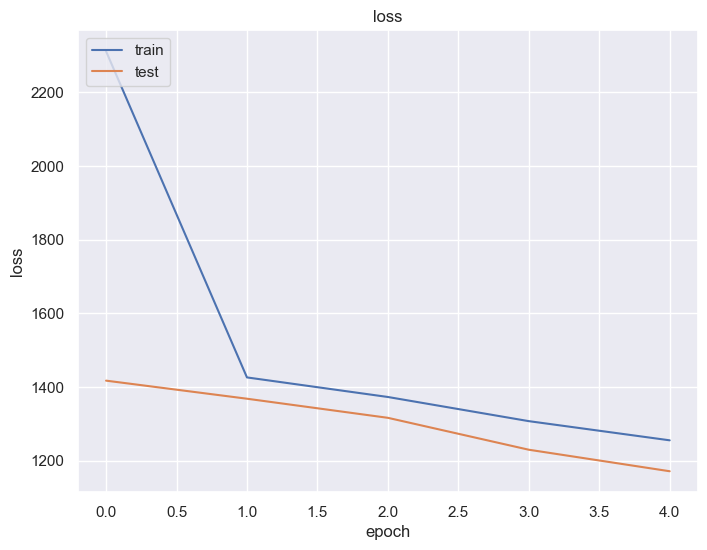

In [210]:
plt.plot(history.history['loss' ])
plt.plot(history.history['val_loss' ])
plt.title('loss' )
plt.ylabel('loss' )
plt.xlabel('epoch' )
plt.legend(['train' ,'test' ], loc='upper left' )
plt.show()

In [211]:
y_pred = model.predict(X_test)

113/113 [==============================] - 1s 4ms/step


In [212]:
from sklearn import metrics

print ('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1188.2240797243453
Mean Squared Error: 3034889.48018978
Root Mean Squared Error: 1742.0934189043307


In [214]:
df['price'].mean()

12279.534843593454

We can find the mean percentage error by dividing MAE by the average of the
Price column, i.e., 1188/12279 = 0.0967. The value shows that, on average, for all the
cars in the test set, the prices predicted by our feedforward neural network and the
actual prices differ by 9.67 percent.

In [215]:
comparison_df = pd.DataFrame({'Actual' : y_test.values.tolist(), 'Predicted' : y_pred.tolist()})
comparison_df

,Actual,Predicted
0,15500,[11653.087890625]
1,22975,[17283.380859375]
2,10299,[9555.41796875]
3,17480,[17182.8671875]
4,5981,[6420.908203125]
...,...,...
3589,28495,[25096.265625]
3590,21750,[19164.5234375]
3591,10499,[10733.181640625]
3592,16000,[16598.26171875]


In [216]:
X_test[1].shape

(8,)

In [217]:
single_point = X_test[1].reshape(1,-1)
single_point.shape

(1, 8)

In [218]:
model.predict(X_test[1].reshape(1,-1))

1/1 [==============================] - 0s 50ms/step


array([[17283.38]], dtype=float32)

The predicted price is 17283.38

In [219]:
y_test.values[1 ]

22975